# shapely

Manual: http://toblerity.org/shapely/manual.html

In [7]:
import shapely

## Intersection

In [8]:
from shapely.geometry import LineString

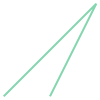

In [9]:
line1 = LineString([ (0, 0), (2,2), (1, 0)])
line1

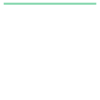

In [10]:
line2 = LineString([ (0,1), (3,1)])
line2

In [11]:
line1.intersects(line2)

True

Populating the interactive namespace from numpy and matplotlib


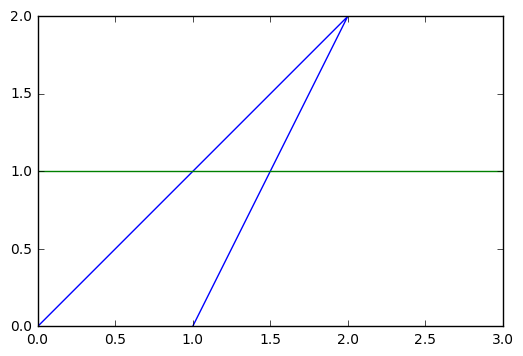

In [12]:
%pylab inline 
plot(*line1.xy)
plot(*line2.xy)

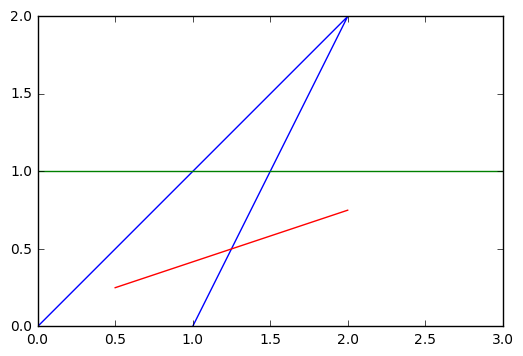

In [13]:
line3 = LineString([ (0.5, 0.25), (2.0, 0.75)])
lines = [line1, line2, line3]
for line in lines:
    plot(*line.xy)

In [14]:
line3.intersects(line2)

False

In [15]:
line3.intersects(line1)

True

In [16]:
line3.intersection(line1).xy

(array('d', [1.25]), array('d', [0.5]))

In [17]:
int_31 = line3.intersection(line1)

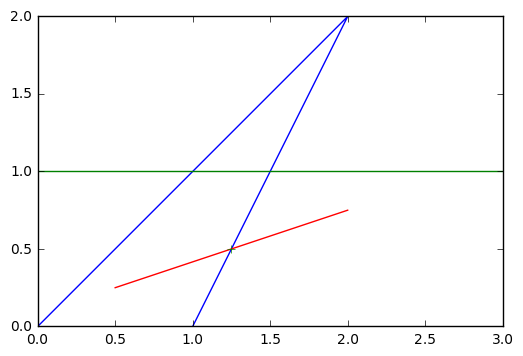

In [18]:
for line in lines:
    plot(*line.xy)
plot(*line3.intersection(line1).xy, "+g")

## Containment

In [19]:
from shapely.geometry.polygon import  LinearRing, Polygon
r0 = LinearRing([ [0.7, 0.25], [0.7, 0.9], [2, 0.9], [2, 0.25], [0.7, 0.25]])

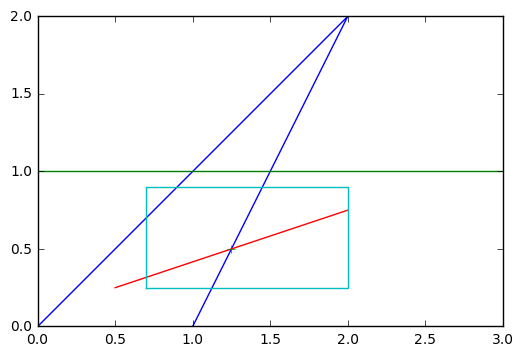

In [20]:
for line in lines:
    plot(*line.xy)
plot(*line3.intersection(line1).xy, "+g")
plot(*r0.xy)

In [21]:
r0.xy

(array('d', [0.7, 0.7, 2.0, 2.0, 0.7]),
 array('d', [0.25, 0.9, 0.9, 0.25, 0.25]))

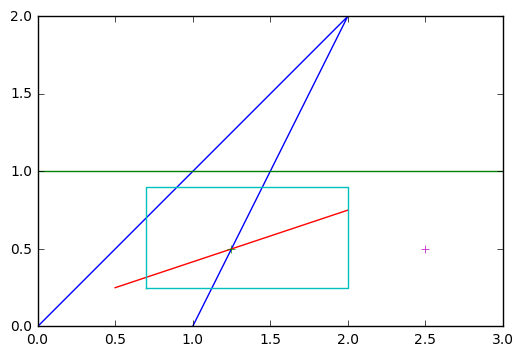

In [22]:
from shapely.geometry import Point

point2 = Point((2.5,0.5))
for line in lines:
    plot(*line.xy)
plot(*line3.intersection(line1).xy, "+g")
plot(*r0.xy)
plot(*point2.xy, '+')

In [23]:
r0.contains(point2)

False

In [24]:
r0.contains(int_31)

False

In [25]:
from shapely.geometry import Polygon

In [26]:
p0 = Polygon(r0)

In [27]:
type(p0)

shapely.geometry.polygon.Polygon

In [28]:
p0.contains(int_31)

True

In [29]:
p0.contains(point2)

False

In [30]:
type(int_31)

shapely.geometry.point.Point

In [31]:
type(p0)

shapely.geometry.polygon.Polygon

In [32]:
int_31.within(p0)

True

## Shapely and GeoJson

In [33]:
import json

In [34]:
f = "countries.geojson"
with open(f, 'r') as infile:
    gj = json.load(infile)

In [35]:
from shapely.geometry import asShape

polygons = []
multipolygons = []
sf = []
for i,feature in enumerate(gj['features']):
    sf.append( asShape(feature['geometry']))
    if feature['geometry']['type'] == "MultiPolygon":
        multipolygons.append(i)
    else:
        polygons.append(i)

In [36]:
from shapely.geometry import asShape, shape

polygons = []
multipolygons = []
sf = []
for i,feature in enumerate(gj['features']):
    sf.append( shape(feature['geometry']))
    if feature['geometry']['type'] == "MultiPolygon":
        multipolygons.append(i)
    else:
        polygons.append(i)

In [37]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/serge/anaconda/envs/py3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'f', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


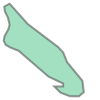

In [38]:
sf[0]

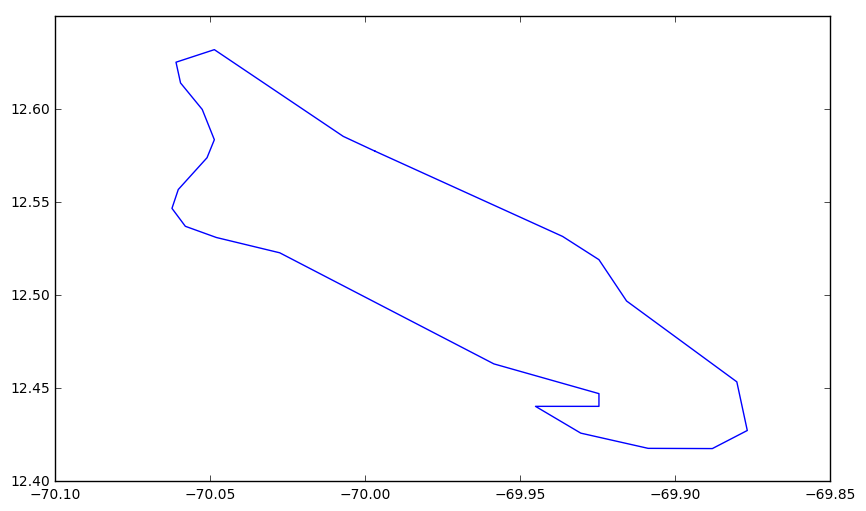

In [39]:
x,y = sf[0].exterior.xy
plot(x,y)

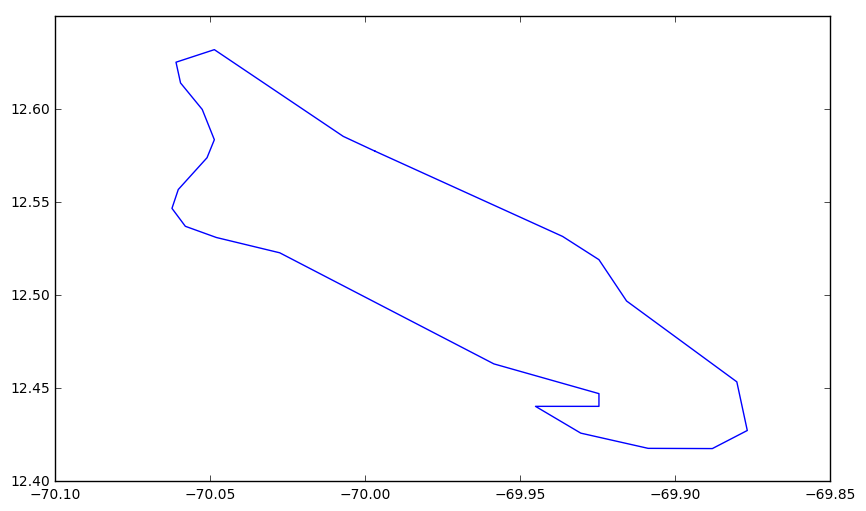

In [40]:
plot(*sf[0].exterior.xy)

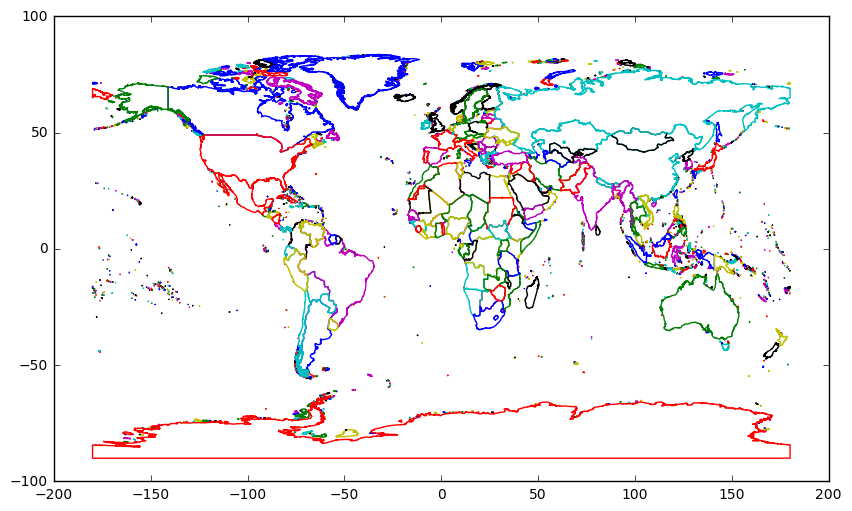

In [41]:
for f in sf:
    try:
        plot(*f.exterior.xy) # polygon
    except:
        for geom in f.geoms:   # multipolygon
            plot(*geom.exterior.xy) 

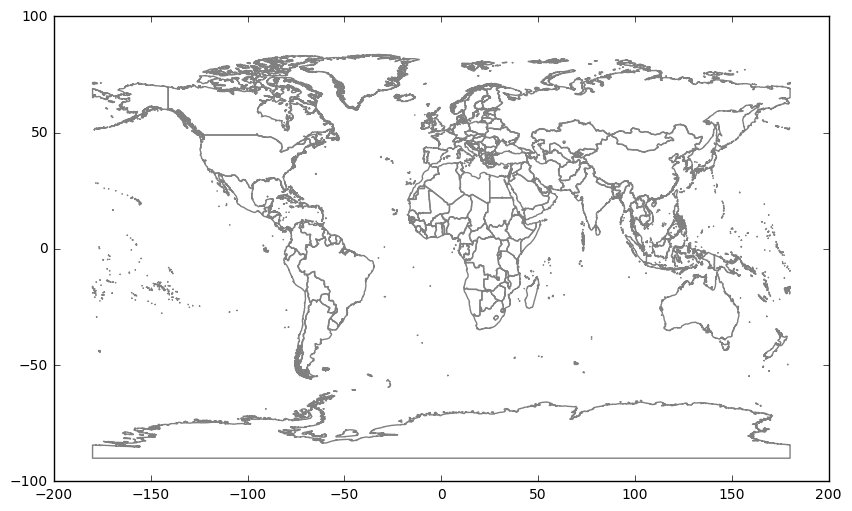

In [42]:
for f in sf:
    try:
        plot(*f.exterior.xy, 'grey') # polygon
    except:
        for geom in f.geoms:   # multipolygon
            plot(*geom.exterior.xy, 'grey') 

In [43]:
mplast = multipolygons[-1]

In [44]:
type(mplast)

int

In [45]:
mplast

252

In [46]:
mpl = sf[252]

In [47]:
type(mpl)

shapely.geometry.multipolygon.MultiPolygon

In [48]:
mpl.bounds

(16.46998131600006, -46.96575286299996, 37.977793816000116, -22.12645192499987)

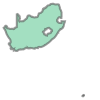

In [49]:
mpl

In [50]:
h = mpl.convex_hull

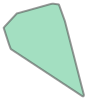

In [51]:
h

In [52]:
h.contains?

In [53]:
type(h)

shapely.geometry.polygon.Polygon

In [54]:
h.area

276.17201572526784

In [55]:
mpl.area

113.10134208448235

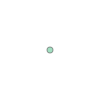

In [56]:
mpl.centroid

In [57]:
mpl.contains(mpl.centroid)

True

In [58]:
mpl.geoms

In [59]:
cs = [ part.centroid for part in mpl.geoms]

In [60]:
cs

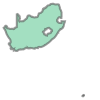

In [61]:
mpl

In [62]:
mpl.contains(cs[0])

True

In [63]:
mpl.contains(cs[1])

True

In [64]:
mpl.contains(cs[2])

True

In [65]:
mpl.bounds

(16.46998131600006, -46.96575286299996, 37.977793816000116, -22.12645192499987)

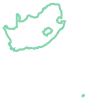

In [66]:
mpl.boundary

In [67]:
x0, y0, x1, y1 = mpl.bounds
x0, y0, x1, y1

(16.46998131600006, -46.96575286299996, 37.977793816000116, -22.12645192499987)

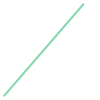

In [68]:
diagbb = LineString([(x0, y0), (x1, y1)])
diagbb

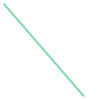

In [69]:
rdiagbb = LineString([(x1, y0), (x0, y1)])
rdiagbb

In [70]:
type(mpl)

shapely.geometry.multipolygon.MultiPolygon

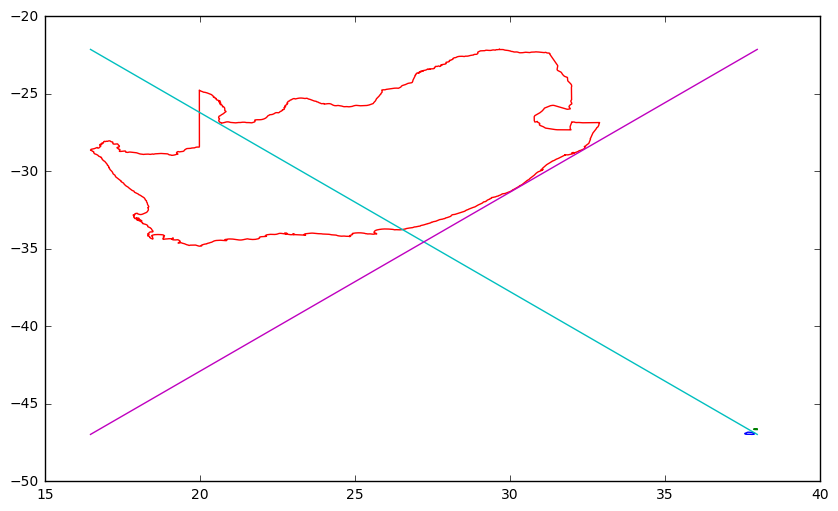

In [71]:
for geom in mpl.geoms:   # multipolygon
            plot(*geom.exterior.xy) 
plot(*rdiagbb.xy)
plot(*diagbb.xy)

In [72]:
mpl.crosses(diagbb)

False

In [73]:
diagbb.crosses(mpl)

False

In [74]:
mpl.crosses(rdiagbb)

True

In [75]:
rdiagbb.crosses(mpl)

True

## Find all the features that are on the equator

In [76]:
eline = LineString([ (-179.0, 0), (-10, 0), (10, 0) , (180, 0)])

In [77]:
ef = [ f for f in sf if f.crosses(eline)]

In [78]:
len(ef)

10

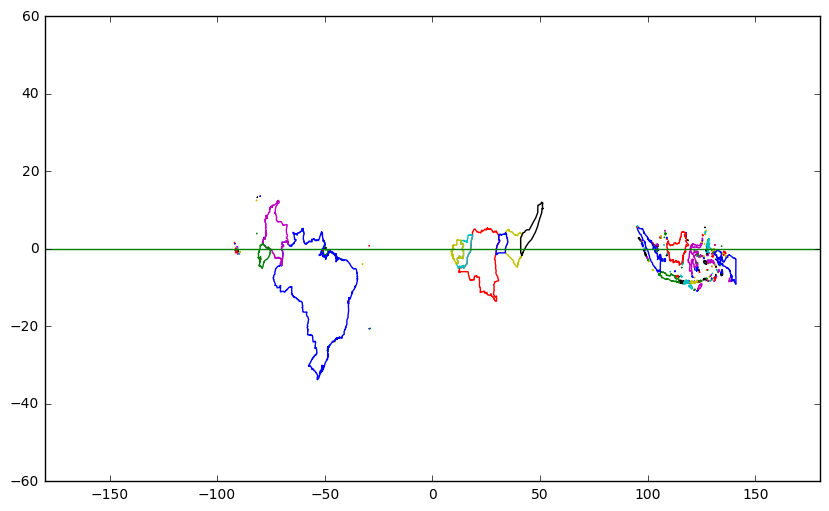

In [79]:
for f in ef:
    try:
        plot(*f.exterior.xy) # polygon
    except:
        for geom in f.geoms:   # multipolygon
            plot(*geom.exterior.xy) 
xlim(-180, 180)
ylim(-60, 60)
plot([-180, 180],[0,0])